<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Statistical Testing: Single Sample Tests For Proportion

---


Day 2 after our game launch: The project manager is worried that we would not hit a 30% day-one retention rate for users.

Let's look at the stats for the game, and see if they're right.

First, let's load the required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
from IPython.display import Image

import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
from collections import OrderedDict

from __future__ import print_function # compatibility with both Python 2.7 and 3+
from __future__ import division
%matplotlib inline

And let's generate some fake data for installs & retention.

In [2]:
# Imaginary data for our imaginary game company
installs = 448
returned = 123
p = returned/installs
print(' installs = {} \n returned on the next day = {} \n 1-day retention = {:.2f}% \n target >= 30%'
      .format(installs, returned, 100*p))


 installs = 448 
 returned on the next day = 123 
 1-day retention = 27.46% 
 target >= 30%


And plot the data.

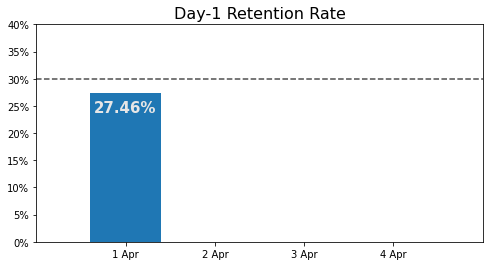

In [3]:
fig, ax = plt.subplots(figsize=(8,4))
bar([1],[p], align='center', width=.8)
plot([0,100],[.3,.3],'--',color='0.3')

xticks(range(1,5))
xlim(0,5)
ylim(0,.40)
#ax.set_xticklabels(['%d Apr'%d for d in range(6,10)])
ax.set_xticklabels(['%d Apr'%d for d in range(1,5)])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos=0: '%0.0f%%'%(100.0*x)))
title('Day-1 Retention Rate', fontdict={'size':16})
ax.text(1, p*.95, '%0.2f%%'%(100*p),ha='center', va='top', fontdict={'size':15,'weight':'bold','color':(0.9,.9,.9)})
pass
# fig.savefig('02.01 day-1 retention.png', bbox_inches='tight', pad_inches=0.2 ,dpi=200)

Because we're testing for *proportion* for a single sample, we will use z-test for proportion. 

<img src="assets/images/testing_2.png" style="width:100%" />

#### *One sample z-test for Proportion*

### $z = \frac{\hat{p}-p}{\sqrt{\frac{p (1-p)}{n}}}$
where

- $\hat{p}$ = sample proportion

- $p$ = population proportion

- $n$ = sample size





So, our null hypothesis is:
    
    retention rate is >= 30%
    
Alternate hypthesis is:

    retention rate is < 30%
    
and $\alpha = 0.05$

In [4]:
# using statsmodels
from statsmodels.stats.proportion import proportions_ztest
z,p = proportions_ztest(returned, installs, value=.3, alternative='smaller', prop_var=.3)
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -1.175320190850308 
 p-value = 0.11993331980861971


We fail to reject the null hypothesis.

### Confidence Interval

Finally, let's calculate the 95% confidence interval for the retention rate.

#### $CI = \hat{p} ± z_{critical} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $ 

where

- $\hat{p}$ = sample proportion

- $p$ = population proportion

- $n$ = sample size



In [5]:
from statsmodels.stats.proportion import proportion_confint 
ci_low, ci_upp = proportion_confint(returned, installs)
print(' 95% Confidence Interval = ( {0:.2f}% , {1:.2f}% )'.format(100*ci_low, 100*ci_upp))

 95% Confidence Interval = ( 23.32% , 31.59% )


**So, our 95% Confidence Interval for the retention rate is [23.32% , 31.59%]**